<a href="https://colab.research.google.com/github/DoniaGabal/Telco_Customer_Churn/blob/main/Telco_Customer_Churn_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Dataset Overview:

The Telco Customer Churn dataset contains customer details, service usage, billing information, and churn status. It aims to analyze customer behavior and predict churn (customer leaving the company).

##Dataset Columns Overview

customerID –> Unique identifier for each customer.

gender –> Customer's gender (Male/Female).

SeniorCitizen –> Indicates if the customer is a senior citizen (1 = Yes, 0 = No).

Partner –> Whether the customer has a partner (Yes/No).

Dependents –> Whether the customer has dependents (Yes/No).

tenure –> Number of months the customer has stayed with the company.

PhoneService –> Whether the customer has a phone service (Yes/No).

MultipleLines –> Whether the customer has multiple phone lines (Yes/No/No phone
service).

InternetService –> Type of internet service (DSL, Fiber optic, None).


OnlineSecurity –> Whether the customer has online security service (Yes/No).

OnlineBackup –> Whether the customer has online backup service (Yes/No).

DeviceProtection –> Whether the customer has device protection (Yes/No).

TechSupport –> Whether the customer has tech support (Yes/No).

StreamingTV –> Whether the customer has streaming TV service (Yes/No).

StreamingMovies –> Whether the customer has streaming movies service (Yes/No).

Contract –> Type of contract (Month-to-month, One year, Two year).

PaperlessBilling –> Whether the customer uses paperless billing (Yes/No).

PaymentMethod –> Payment method used (Electronic check, Mailed check, Bank
transfer, Credit card).

MonthlyCharges –> The amount charged to the customer monthly.

TotalCharges –> The total amount charged during the customer’s tenure.

Churn –> Target variable (Yes = Customer left, No = Customer stayed).

#Loadind Data & Libiraries

In [ ]:
#import libiraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import learning_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
#load Dataset
df=pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

#Explore Data

In [ ]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
df.head(7)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No


In [ ]:
df.shape

(7043, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
for col in df.columns:
    print(f"Value Counts for Column: {col}")
    print(df[col].value_counts())
    print("-" * 60)

Value Counts for Column: customerID
customerID
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: count, Length: 7043, dtype: int64
------------------------------------------------------------
Value Counts for Column: gender
gender
Male      3555
Female    3488
Name: count, dtype: int64
------------------------------------------------------------
Value Counts for Column: SeniorCitizen
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64
------------------------------------------------------------
Value Counts for Column: Partner
Partner
No     3641
Yes    3402
Name: count, dtype: int64
------------------------------------------------------------
Value Counts for Column: Dependents
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
------------------------------------------------------------
Value Counts for Column: tenure
tenure
1     613
7

In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [ ]:
df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

<ipython-input-14-64493bf53d4b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


#Exploratory Data Analysis (EDA)

In [ ]:
#handle missing values
df.drop(columns=['customerID'], inplace=True)

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


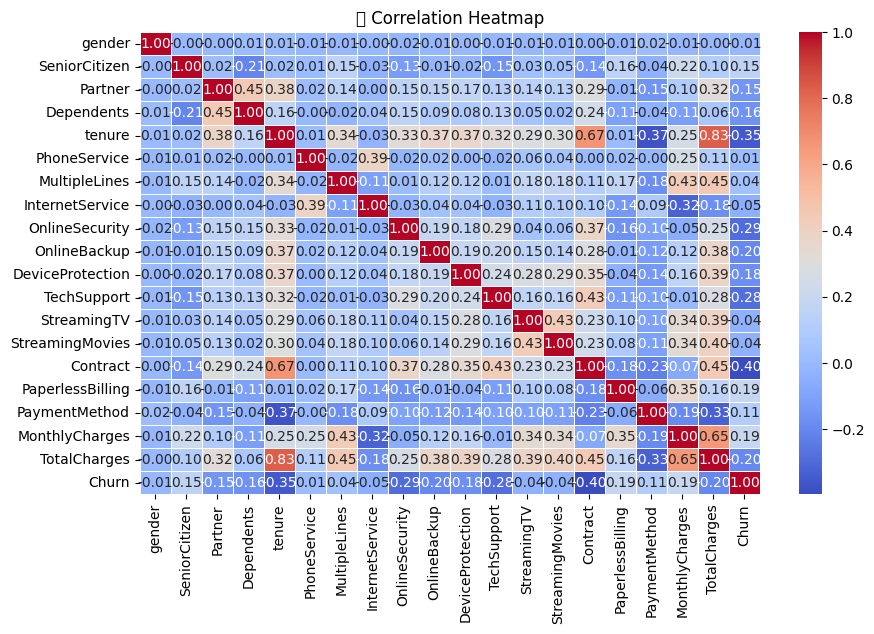

In [ ]:
plt.figure(figsize=(10, 6))
# Calculate correlation only for numerical columns
numerical_features = df.select_dtypes(include=np.number).columns
cor = df[numerical_features].corr()

# Generate the heatmap using the correlation matrix of numerical features
sns.heatmap(cor, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("🔹 Correlation Heatmap")
plt.show()

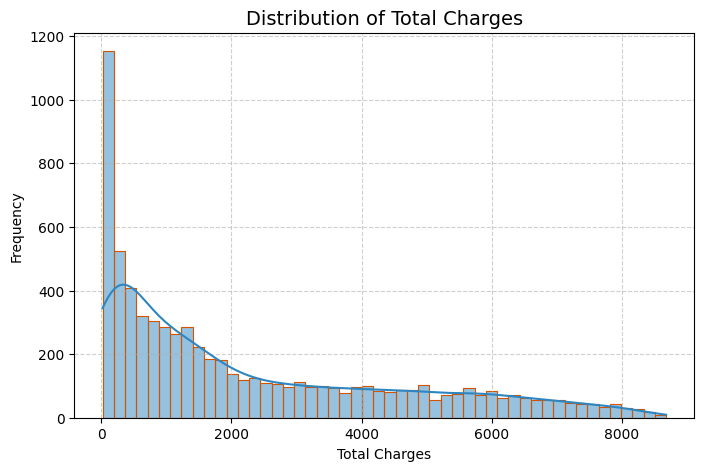

In [ ]:
# Plot Histogram of 'TotalCharges'
plt.figure(figsize=(8, 5))
sns.histplot(df['TotalCharges'], bins=50, kde=True, color='#2E86C1', edgecolor='#D35400')
plt.xlabel('Total Charges')
plt.ylabel('Frequency')
plt.title('Distribution of Total Charges', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

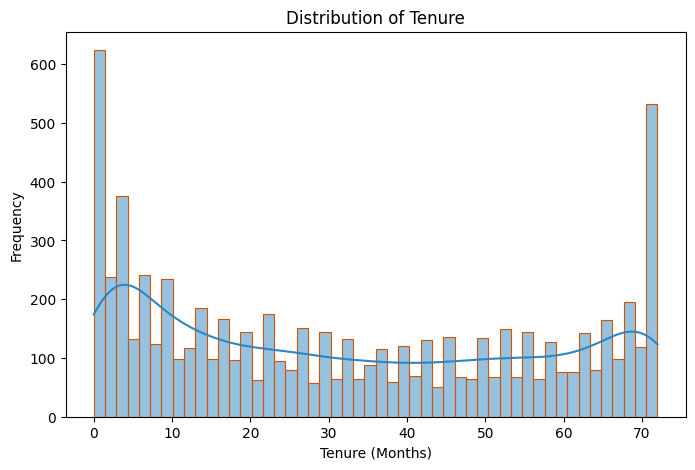

In [ ]:
# Plot Histogram of "Tenure"
plt.figure(figsize=(8, 5))
sns.histplot(df['tenure'], bins=50, kde=True, color='#2E86C1', edgecolor='#D35400')
plt.xlabel('Tenure (Months)')
plt.ylabel('Frequency')
plt.title('Distribution of Tenure')
plt.show()


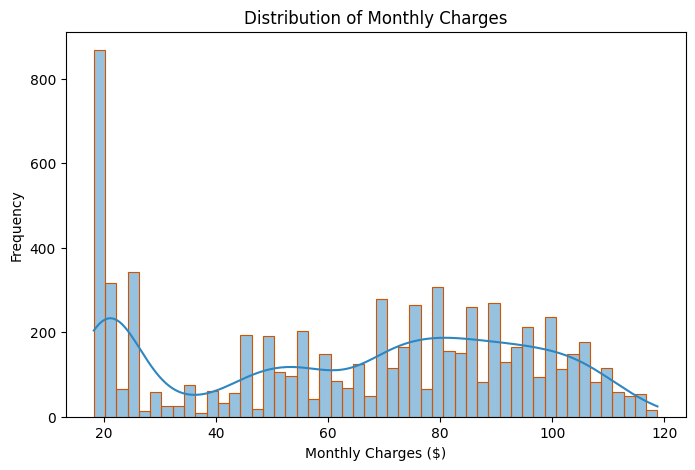

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df['MonthlyCharges'], bins=50, kde=True, color='#2E86C1', edgecolor='#D35400')
plt.xlabel('Monthly Charges ($)')
plt.ylabel('Frequency')
plt.title('Distribution of Monthly Charges')
plt.show()

Text(0.5, 1.0, 'Churn Distribution')

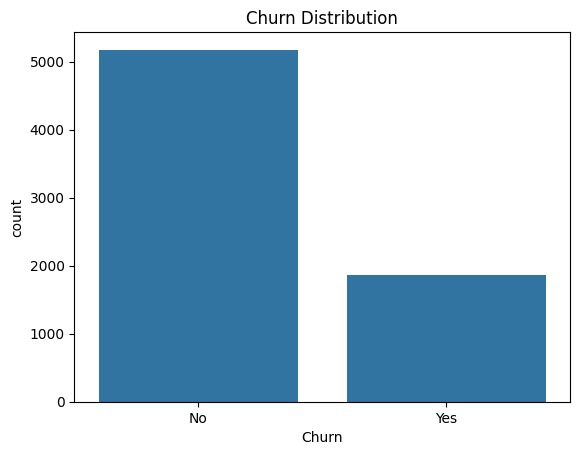

In [ ]:
#Numper of churn people
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')

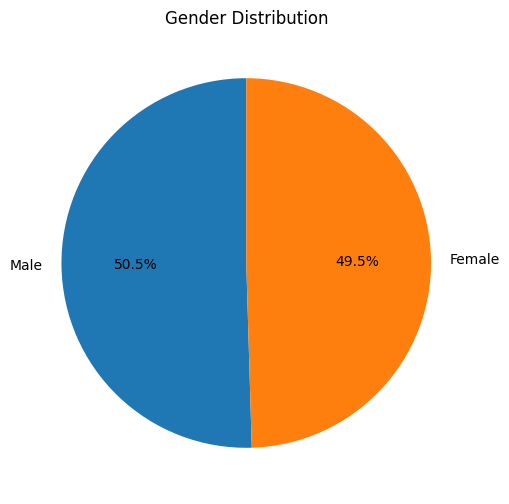

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'gender' is a column in your DataFrame 'df'
gender_counts = df['gender'].value_counts()

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.show()

<ipython-input-24-24487547e0c4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['SeniorCitizen'], palette="viridis")


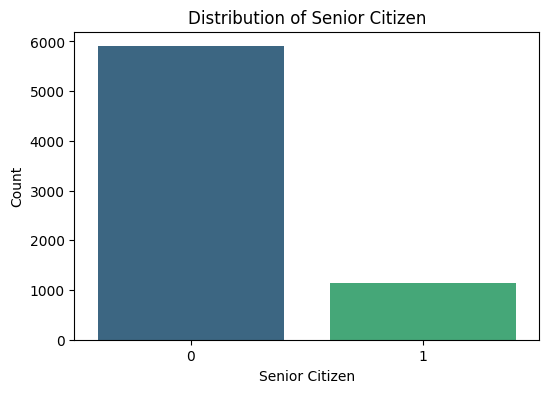

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df['SeniorCitizen'], palette="viridis")
plt.xlabel("Senior Citizen")
plt.ylabel("Count")
plt.title("Distribution of Senior Citizen")
plt.show()


<ipython-input-25-492eb4ce2ba2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Partner'], palette="viridis")


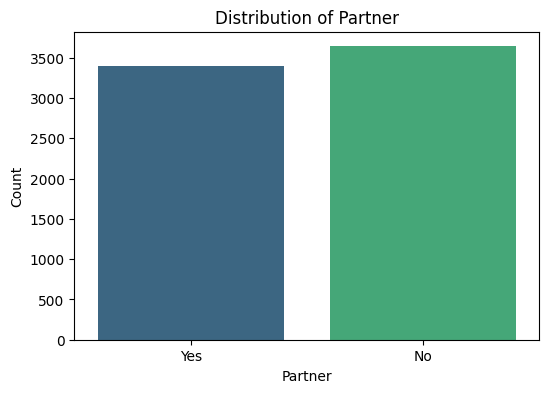

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df['Partner'], palette="viridis")
plt.xlabel("Partner")
plt.ylabel("Count")
plt.title("Distribution of Partner")
plt.show()


<ipython-input-26-1fc4ce983a52>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Dependents'], palette="viridis")


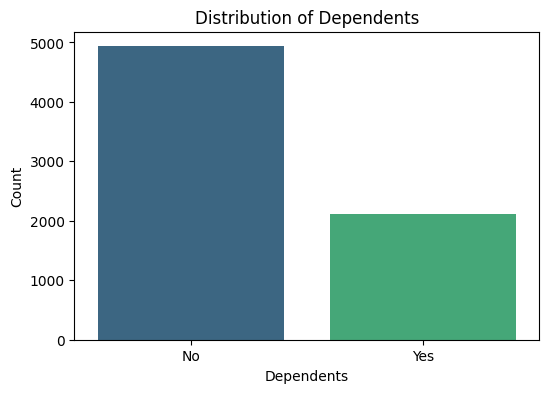

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df['Dependents'], palette="viridis")
plt.xlabel("Dependents")
plt.ylabel("Count")
plt.title("Distribution of Dependents")
plt.show()


<ipython-input-27-b77440270fa8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['PhoneService'], palette="viridis")


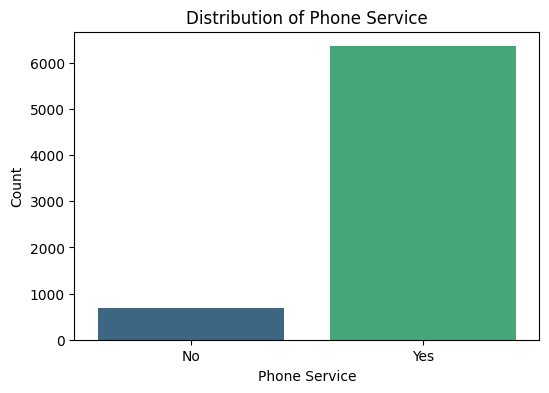

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df['PhoneService'], palette="viridis")
plt.xlabel("Phone Service")
plt.ylabel("Count")
plt.title("Distribution of Phone Service")
plt.show()


<ipython-input-28-dab4e0b922cc>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['MultipleLines'], palette="viridis")


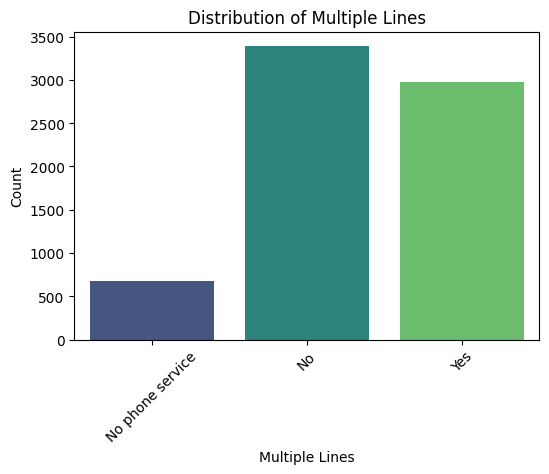

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df['MultipleLines'], palette="viridis")
plt.xlabel("Multiple Lines")
plt.ylabel("Count")
plt.title("Distribution of Multiple Lines")
plt.xticks(rotation=45)
plt.show()


<ipython-input-29-6afd2d6dc879>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['InternetService'], palette="viridis")


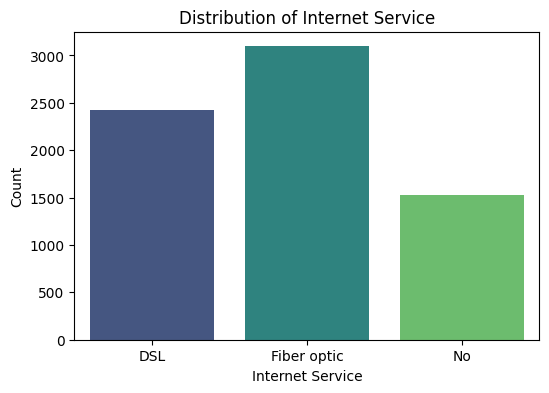

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df['InternetService'], palette="viridis")
plt.xlabel("Internet Service")
plt.ylabel("Count")
plt.title("Distribution of Internet Service")
plt.show()


<ipython-input-30-faab8d1c1115>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['OnlineSecurity'], palette="viridis")


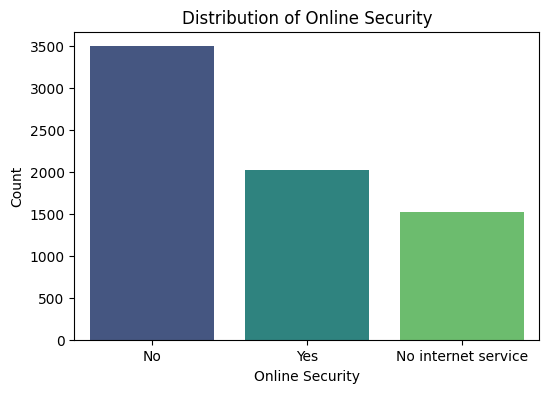

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df['OnlineSecurity'], palette="viridis")
plt.xlabel("Online Security")
plt.ylabel("Count")
plt.title("Distribution of Online Security")
plt.show()


<ipython-input-31-acd2801226e3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['OnlineBackup'], palette="viridis")


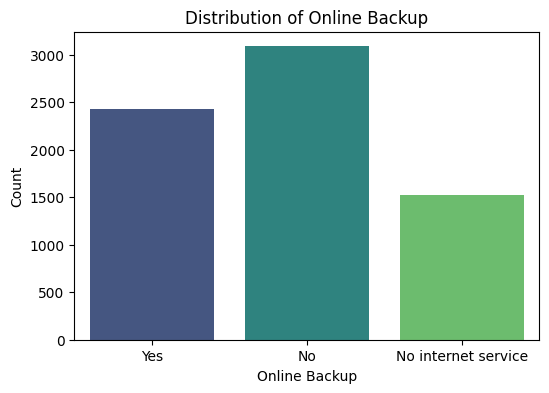

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df['OnlineBackup'], palette="viridis")
plt.xlabel("Online Backup")
plt.ylabel("Count")
plt.title("Distribution of Online Backup")
plt.show()


<ipython-input-32-d7bea98644c6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['DeviceProtection'], palette="viridis")


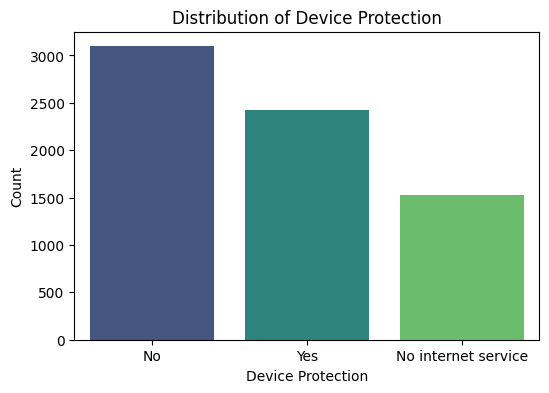

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df['DeviceProtection'], palette="viridis")
plt.xlabel("Device Protection")
plt.ylabel("Count")
plt.title("Distribution of Device Protection")
plt.show()

<ipython-input-33-6fa83e1fabe9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['TechSupport'], palette="viridis")


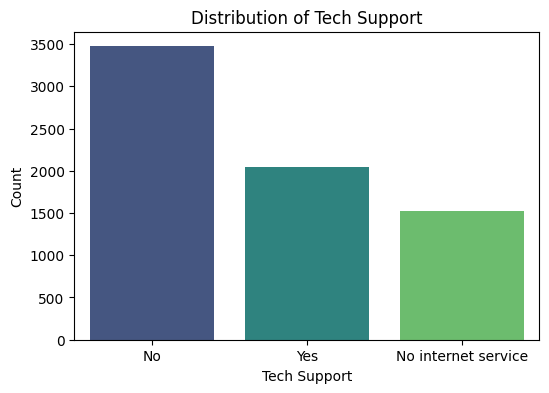

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df['TechSupport'], palette="viridis")
plt.xlabel("Tech Support")
plt.ylabel("Count")
plt.title("Distribution of Tech Support")
plt.show()


<ipython-input-34-132b9b059da1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['StreamingTV'], palette="viridis")


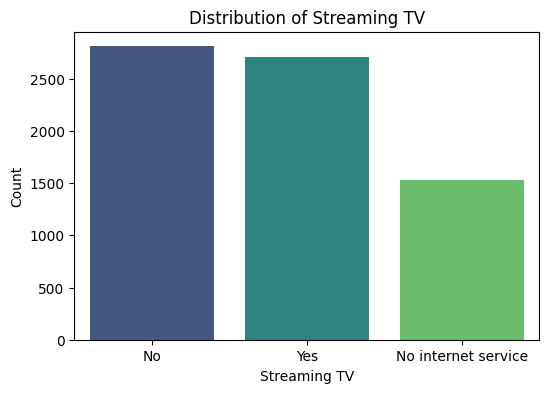

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df['StreamingTV'], palette="viridis")
plt.xlabel("Streaming TV")
plt.ylabel("Count")
plt.title("Distribution of Streaming TV")
plt.show()


<ipython-input-35-504ea803163b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['StreamingMovies'], palette="viridis")


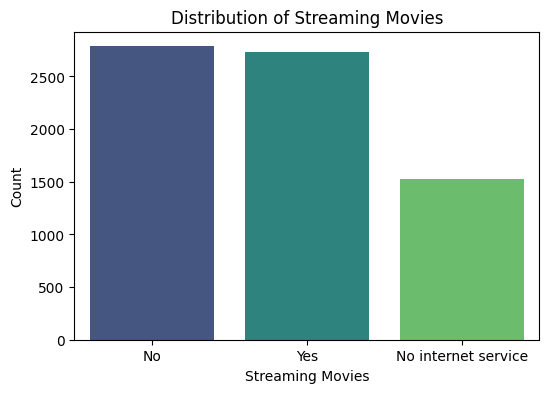

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df['StreamingMovies'], palette="viridis")
plt.xlabel("Streaming Movies")
plt.ylabel("Count")
plt.title("Distribution of Streaming Movies")
plt.show()


<ipython-input-36-4405691303a1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Contract'], palette="viridis")


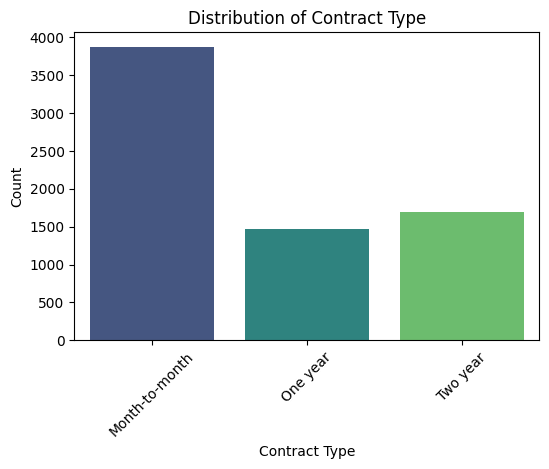

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df['Contract'], palette="viridis")
plt.xlabel("Contract Type")
plt.ylabel("Count")
plt.title("Distribution of Contract Type")
plt.xticks(rotation=45)
plt.show()


<ipython-input-37-25866eada33d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['PaperlessBilling'], palette="viridis")


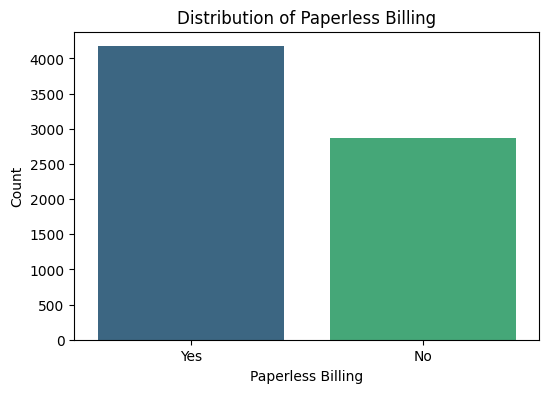

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df['PaperlessBilling'], palette="viridis")
plt.xlabel("Paperless Billing")
plt.ylabel("Count")
plt.title("Distribution of Paperless Billing")
plt.show()


<ipython-input-38-777f08d957e6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['PaymentMethod'], palette="viridis")


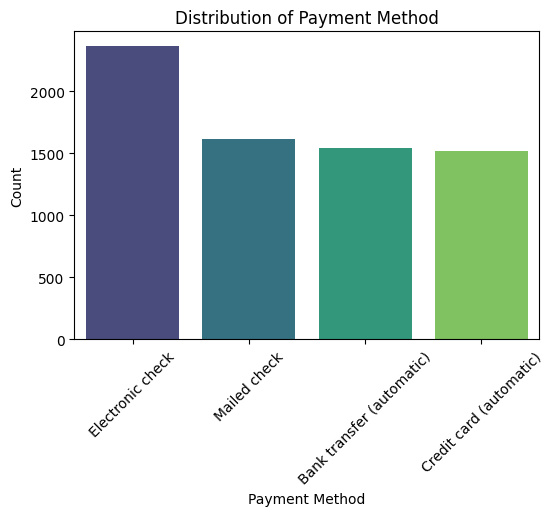

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df['PaymentMethod'], palette="viridis")
plt.xlabel("Payment Method")
plt.ylabel("Count")
plt.title("Distribution of Payment Method")
plt.xticks(rotation=45)
plt.show()


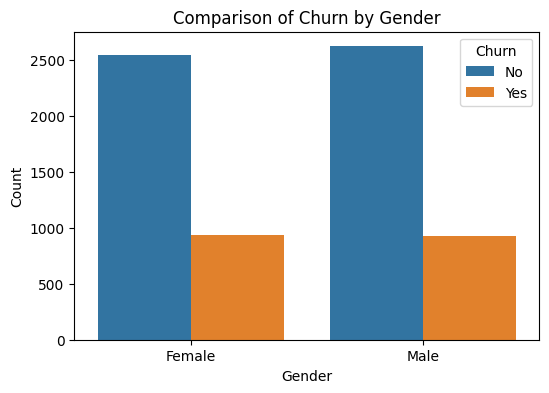

In [ ]:
# Visualization - Gender vs Churn
plt.figure(figsize=(6,4))
sns.countplot(x='gender', hue='Churn', data=df)
plt.title("Comparison of Churn by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Churn", labels=["No", "Yes"])
plt.show()


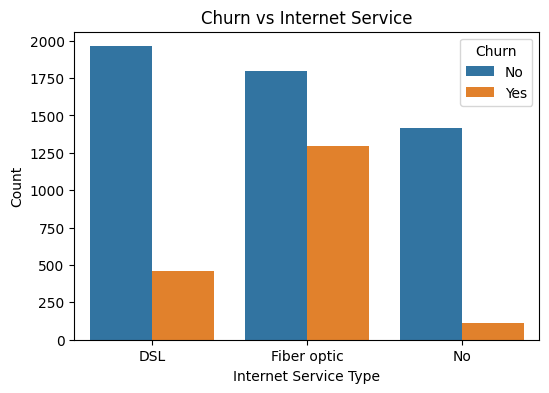

In [ ]:
# Visualization - Churn vs Internet Service
plt.figure(figsize=(6,4))
sns.countplot(x='InternetService', hue='Churn', data=df)
plt.title("Churn vs Internet Service")
plt.xlabel("Internet Service Type")
plt.ylabel("Count")
plt.legend(title="Churn", labels=["No", "Yes"])
plt.show()


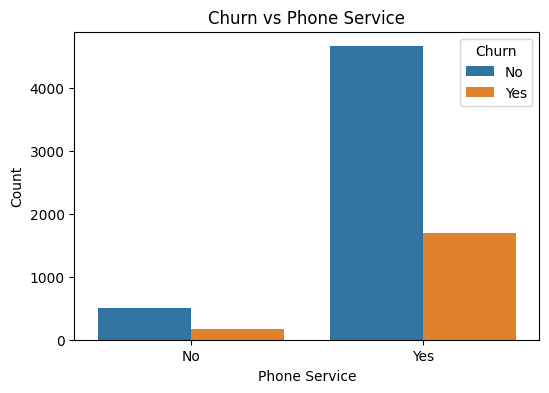

In [ ]:
# Visualization - Churn vs Phone Service
plt.figure(figsize=(6,4))
sns.countplot(x='PhoneService', hue='Churn', data=df)
plt.title("Churn vs Phone Service")
plt.xlabel("Phone Service")
plt.ylabel("Count")
plt.legend(title="Churn", labels=["No", "Yes"])
plt.show()


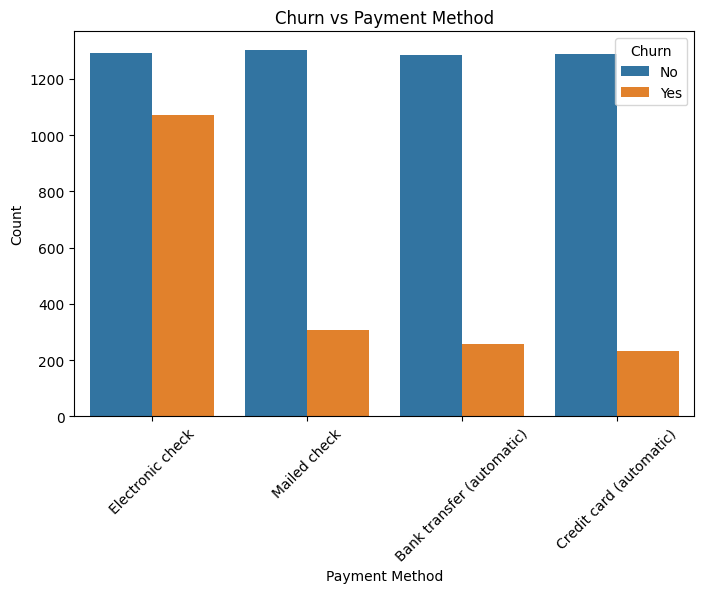

In [ ]:
# Visualization - Churn vs Payment Method
plt.figure(figsize=(8,5))
sns.countplot(x='PaymentMethod', hue='Churn', data=df)
plt.title("Churn vs Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.legend(title="Churn", labels=["No", "Yes"])
plt.show()


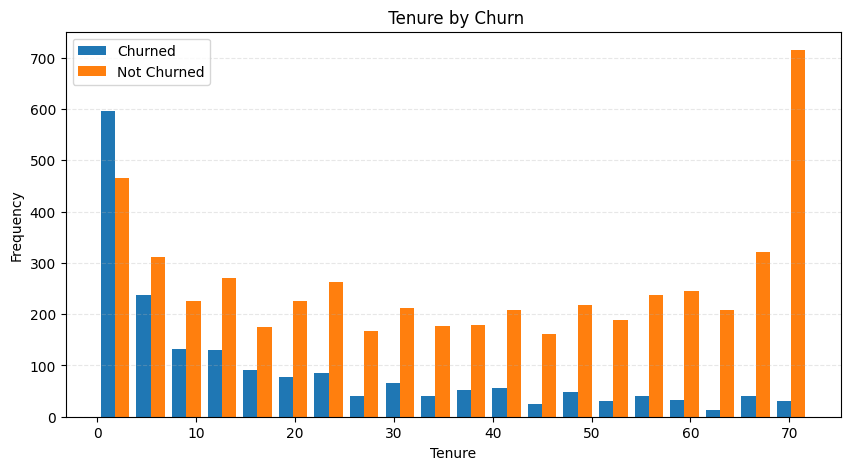

In [ ]:
#Visualise numeric features
churned=df[df["Churn"]=="Yes"]
not_churned=df[df["Churn"]=="No"]

plt.figure(figsize=(10,5))
plt.hist([churned["tenure"],not_churned["tenure"]],bins=20,label=["Churned","Not Churned"])
plt.title(' Tenure by Churn')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.3)

In [ ]:
# Select only numeric features for correlation analysis
numerical_features = df.select_dtypes(include=np.number).columns
cor = df[numerical_features].corr()

#Preprocessing

In [ ]:
# Encoding categorical columns
label_encoders = {}
categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                    'PaperlessBilling', 'PaymentMethod', 'Churn']

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Separating features and target variable
X = df.drop(columns=['Churn'])  # Features
y = df['Churn']  # Target variable

# Scaling numerical columns
scaler = StandardScaler()
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Display transformed dataset
df.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,-1.277445,0,1,0,0,2,0,0,0,0,0,1,2,-1.160323,-0.994242,0
1,1,0,0,0,0.066327,1,0,0,2,0,2,0,0,0,1,0,3,-0.259629,-0.173244,0
2,1,0,0,0,-1.236724,1,0,0,2,2,0,0,0,0,0,1,3,-0.362660,-0.959674,1
3,1,0,0,0,0.514251,0,1,0,2,0,2,2,0,0,1,0,0,-0.746535,-0.194766,0
4,0,0,0,0,-1.236724,1,0,1,0,0,0,0,0,0,0,1,2,0.197365,-0.940470,1


In [ ]:
X = df.drop(columns=['Churn'])  #  (Features)
y = df['Churn']  #  (Target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training data size:", X_train.shape)
print("Testing data size:", X_test.shape)

Training data size: (5634, 19)
Testing data size: (1409, 19)


##ML Models

##Logistic Regression

In [ ]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
accuracies = {}
y_pred_log = log_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))
accuracies["Logistic Regression"] = accuracy_score(y_test, y_pred_log)#82

Logistic Regression Accuracy: 0.8176011355571328
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.58      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



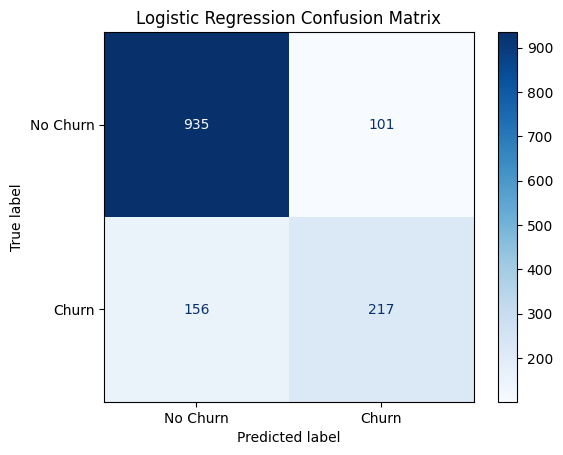

In [ ]:
y_pred = log_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
model_name = "Logistic Regression"
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['No Churn', 'Churn'])
disp.plot(cmap='Blues')
plt.title(f'{model_name} Confusion Matrix')
plt.show()

In [ ]:
def plot_learning_curve(model, X, y, title):
    train_sizes, train_scores, val_scores = learning_curve(
        model, X, y, cv=5, scoring="accuracy", train_sizes=np.linspace(0.1, 1.0, 10)
    )

    train_mean = np.mean(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)

    plt.figure(figsize=(8, 5))
    plt.plot(train_sizes, train_mean, label="Train Accuracy", color='#2E86C1', marker="o")
    plt.plot(train_sizes, val_mean, label="Validation Accuracy", color='#D35400', marker="s")

    plt.xlabel("Training Size")
    plt.ylabel("Accuracy")
    plt.title(f"Learning Curve - {title}")
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.show()


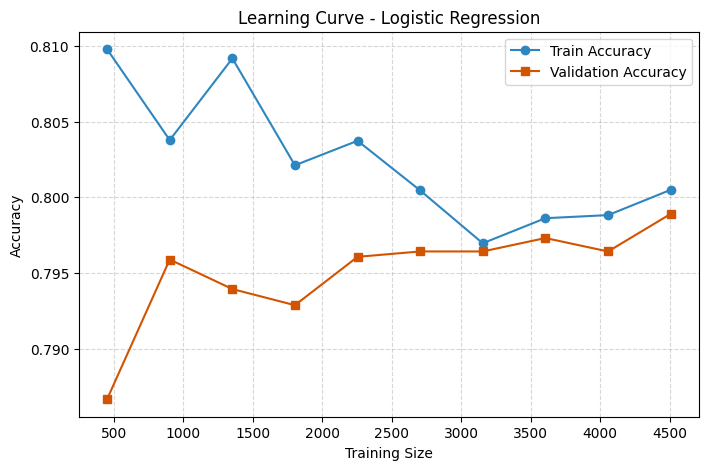

In [ ]:
plot_learning_curve(log_model, X_train, y_train, "Logistic Regression")

##Decision Tree

In [ ]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred_dt = dt_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
accuracies["Decision Tree"] = accuracy_score(y_test, y_pred_dt)

Decision Tree Accuracy: 0.7260468417317246
              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1036
           1       0.48      0.51      0.50       373

    accuracy                           0.73      1409
   macro avg       0.65      0.66      0.65      1409
weighted avg       0.73      0.73      0.73      1409

Decision Tree Accuracy: 0.7260468417317246


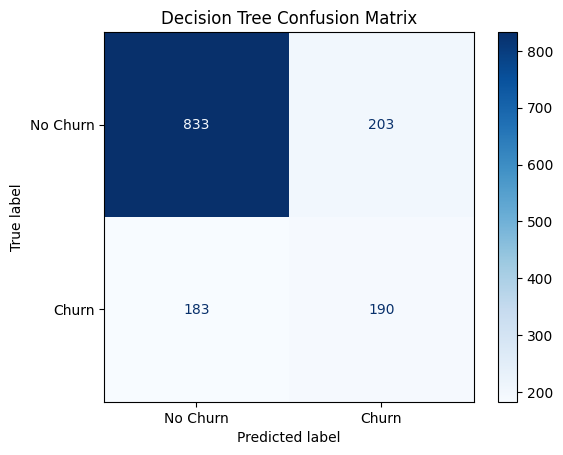

In [ ]:
y_pred = dt_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
model_name = "Decision Tree"
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['No Churn', 'Churn'])
disp.plot(cmap='Blues')
plt.title(f'{model_name} Confusion Matrix')
plt.show()

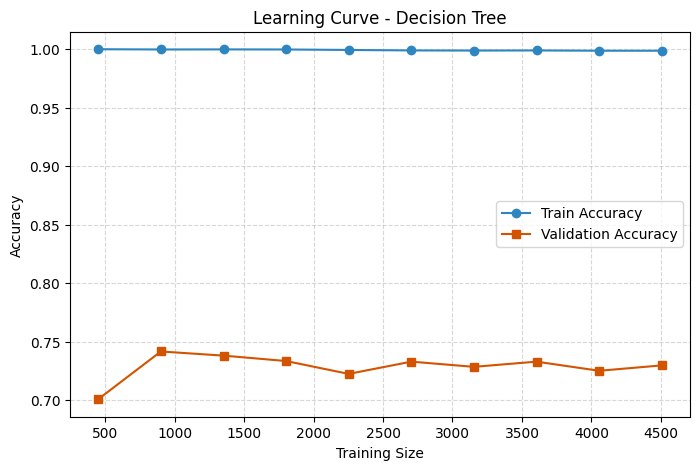

In [ ]:
plot_learning_curve(dt_model, X_train, y_train, "Decision Tree")


##Random Forest

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
accuracies["Random Forest"] = accuracy_score(y_test, y_pred_rf)

Random Forest Accuracy: 0.794889992902768
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.47      0.55       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409

Random Forest Accuracy: 0.794889992902768


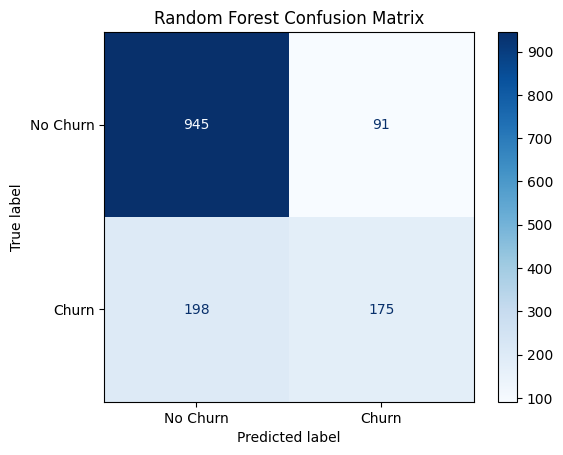

In [ ]:
y_pred = rf_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
model_name = "Random Forest"
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['No Churn', 'Churn'])
disp.plot(cmap='Blues')
plt.title(f'{model_name} Confusion Matrix')
plt.show()

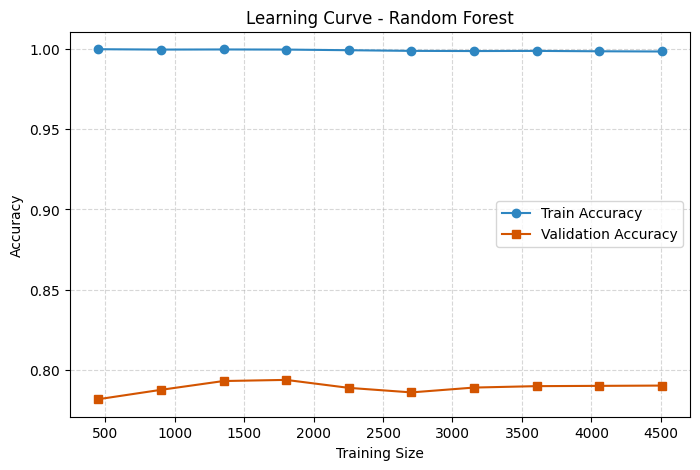

In [ ]:
plot_learning_curve(rf_model, X_train, y_train, "Random Forest")


##SVM

In [ ]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [ ]:
y_pred_svm = svm_model.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

y_pred_svm = svm_model.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
accuracies["SVM"] = accuracy_score(y_test, y_pred_svm)

SVM Accuracy: 0.8105039034776437
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1036
           1       0.69      0.51      0.59       373

    accuracy                           0.81      1409
   macro avg       0.77      0.71      0.73      1409
weighted avg       0.80      0.81      0.80      1409

SVM Accuracy: 0.8105039034776437


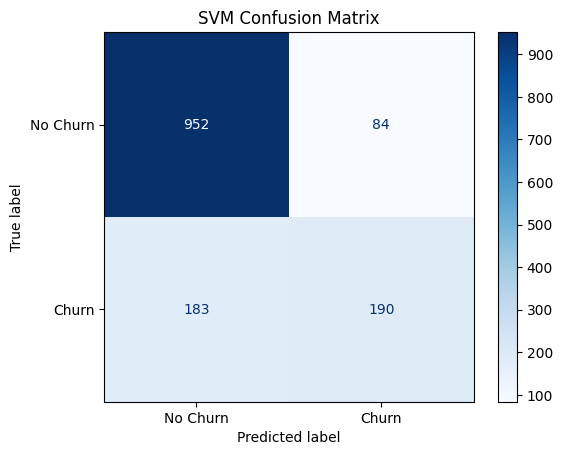

In [ ]:
y_pred = svm_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
model_name = "SVM"
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['No Churn', 'Churn'])
disp.plot(cmap='Blues')
plt.title(f'{model_name} Confusion Matrix')
plt.show()

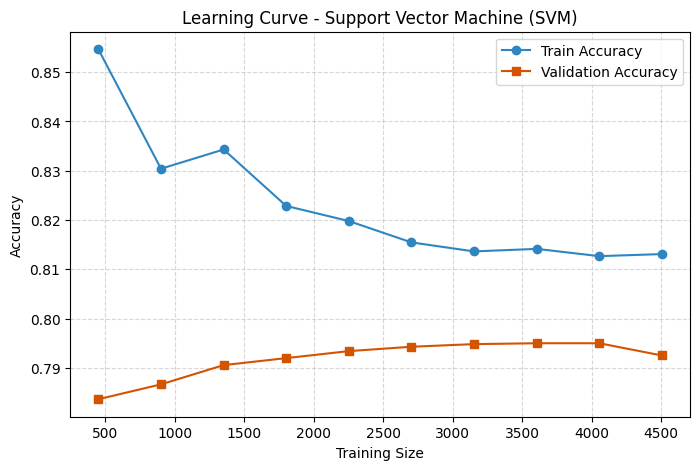

In [ ]:
plot_learning_curve(svm_model, X_train, y_train, "Support Vector Machine (SVM)")


## Find the best model based on accuracy

In [ ]:
# Find the best model based on accuracy
best_model = max(accuracies, key=accuracies.get)
best_accuracy = accuracies[best_model]

print(f"🔹 Best Model: {best_model} with Accuracy: {best_accuracy:.4f}")

🔹 Best Model: Logistic Regression with Accuracy: 0.8176


<ipython-input-65-c583a3011882>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette='viridis')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


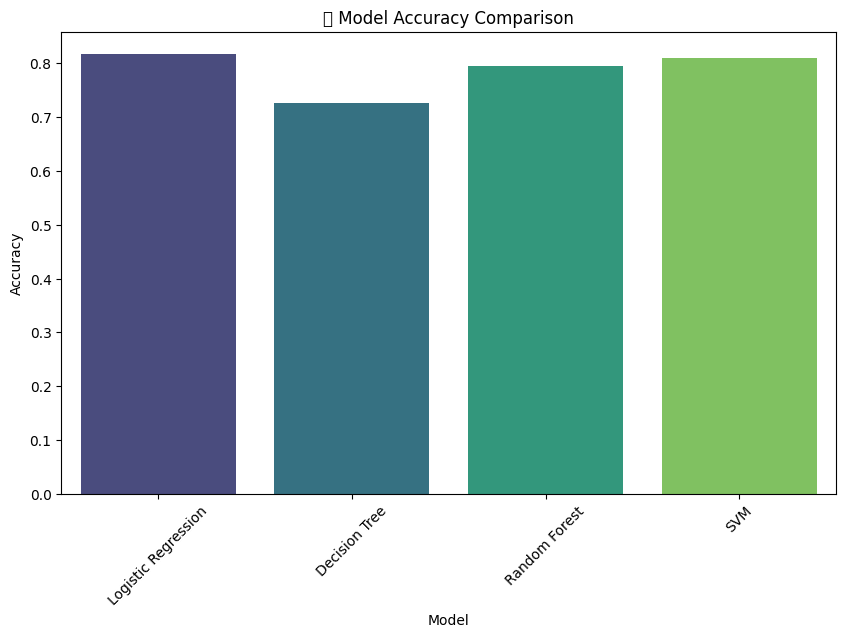

In [ ]:
# Plot accuracy comparison
plt.figure(figsize=(10, 6))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette='viridis')
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("📊 Model Accuracy Comparison")
plt.xticks(rotation=45)
plt.show()


##Deep learning

In [ ]:
# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Input Layer
    Dropout(0.3),  # Dropout for regularization
    Dense(32, activation='relu'),  # Hidden Layer
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Output Layer (Binary Classification)
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,393 (13.25 KB)

 Trainable params: 3,393 (13.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)


Epoch 1/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7511 - loss: 0.5047 - val_accuracy: 0.8105 - val_loss: 0.4104
Epoch 2/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7906 - loss: 0.4594 - val_accuracy: 0.8084 - val_loss: 0.4057
Epoch 3/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7814 - loss: 0.4413 - val_accuracy: 0.8126 - val_loss: 0.4066
Epoch 4/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7821 - loss: 0.4468 - val_accuracy: 0.8183 - val_loss: 0.4025
Epoch 5/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7884 - loss: 0.4421 - val_accuracy: 0.8105 - val_loss: 0.4065
Epoch 6/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8005 - loss: 0.4220 - val_accuracy: 0.8162 - val_loss: 0.4074
Epoch 7/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7997 - loss: 0.4247 - val_accuracy: 0.8155 - val_loss: 0.4014
Epoch 8/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7929 - loss: 0.4362 - val_accuracy: 0.

In [ ]:
# Evaluate on test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nDeep Learning Model Accuracy: {accuracy:.4f}")


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8005 - loss: 0.4144

Deep Learning Model Accuracy: 0.8084


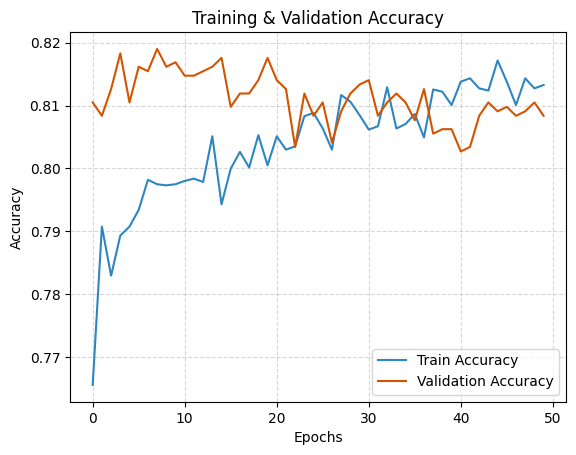

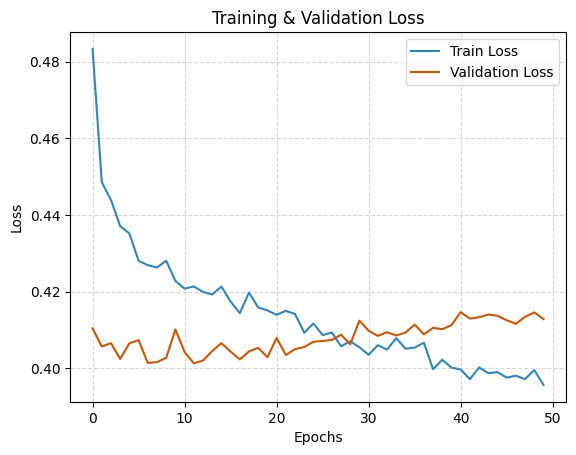

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy', color='#2E86C1')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='#D35400')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss', color='#2E86C1')
plt.plot(history.history['val_loss'], label='Validation Loss', color='#D35400')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()
